# waves

In [1515]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time

**main variables**
<br> f - main frequency (Hz)
<br> full_f - the entire time-frequency function (Hz) ("x" as x axis)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)
<br> amp - amplitude of signal
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.
<br> Or import one in.

In [1496]:
eznemfutle
f=40
#t=4
samples=4000
s_rate=1000
t=samples/s_rate
randamp=3
nyquist=samples/2/t
frangemax=40#nyquist

xf=np.linspace(0.0, frangemax, frangemax*t+1)
x = np.linspace(0.0, t, samples)
full_f=(f-65/(x+1.1))  #   f/2+np.sin(2*np.pi*x)   f+x*0.01        
full_f_phase = np.zeros(samples)
for i in range (samples):
    full_f_phase[i]=np.sum(full_f[:i])/500
    
amp=0.4+x/t*0.6

s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)/(0.5*randamp+1)

#f1=f; f2=f/np.sqrt(2); s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


In [1564]:
cpc_sav_dic1 = io.readsav('C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\AUGD_34924_2208_2238_Loaded-with-MTR.sav', python_dict = True)
s=np.array(cpc_sav_dic1['data'][1])
x=np.array(cpc_sav_dic1['timeax'])
#print(cpc_sav_dic1)
#print('\n\n',x)

In [1576]:
s = s.astype(float)
x = x.astype(float)
samples=s.size
full_f = np.zeros(samples)
t=max(x)-min(x)
nyquist=samples/2/t
frangemax=50000#nyquist#
xf=np.linspace(0.0, frangemax, frangemax*t+1)
s_rate=x.size/t
print(s_rate)

2000033.3333333463


C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

In [1532]:
usewidgets=1
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=0

FloatSlider(value=0.0)

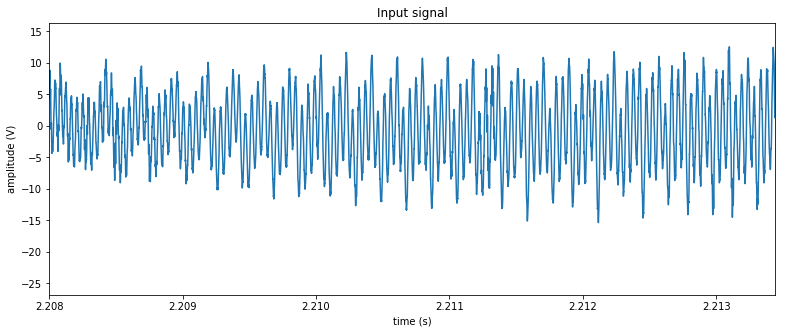

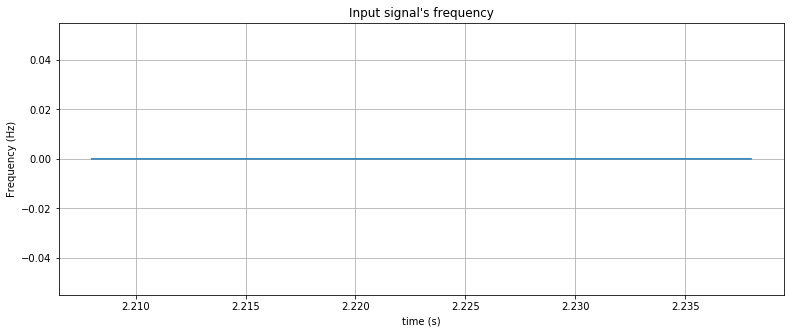

0.0


In [1568]:
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
plt.axis([min(x),max(x)-(max(x)-min(x))/(1.05**view.value),min(s),max(s)])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

plt.figure(figsize=(13,5))
plt.title("Input signal's frequency")
plt.plot(x,full_f)
#yaxismax=1/2**(view.value/12)
#plt.xlim(-0.01,t/(1.05**view.value))
plt.ylabel('Frequency (Hz)')
plt.xlabel('time (s)')
plt.grid(True)
plt.show()

print(full_f[-1]*t)

## Fourier transform and examining it
<br>Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

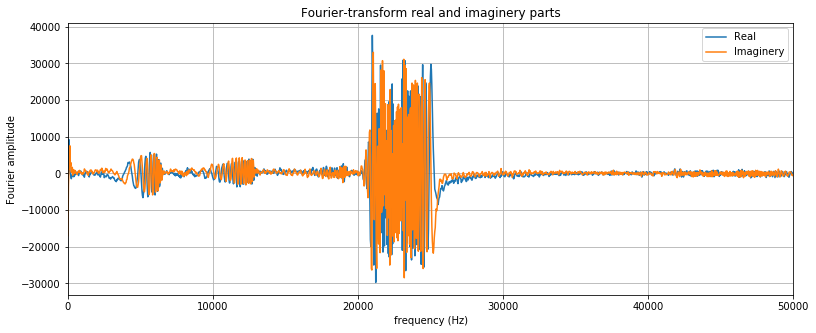

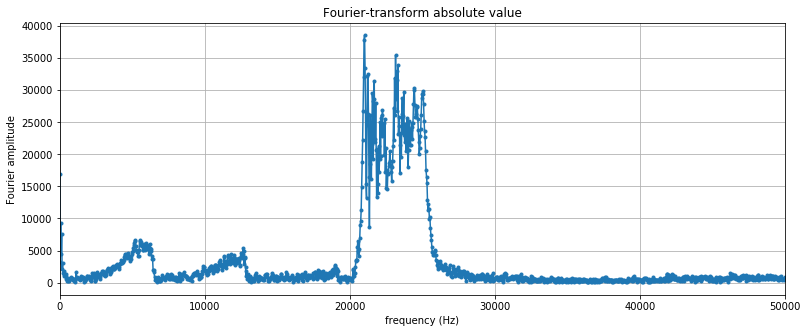

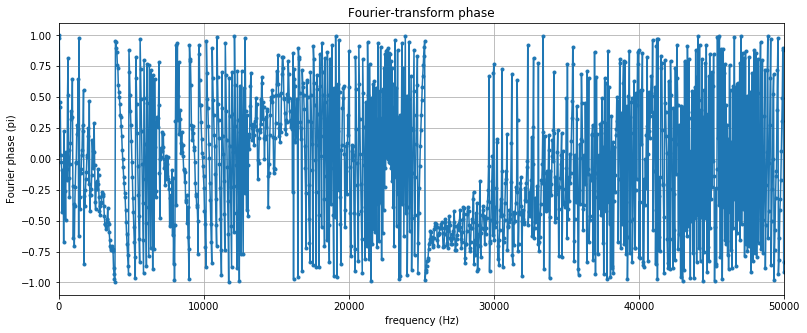

In [1577]:
yf = scipy.fftpack.fft(s)
yfabs=np.abs(yf[:xf.size])
yfang=np.angle(yf[:xf.size])
yfimag=np.imag(yf[:xf.size])
yfreal=np.real(yf[:xf.size])
#yfabs=(np.abs(yf[:frangemax])*np.abs(yfimag)*np.abs(yfreal))

plt.figure(figsize=(13,5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
#plt.xscale('log')
plt.title('Fourier-transform real and imaginery parts')
plt.grid(True)
plt.legend(('Real', 'Imaginery'))
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

yfang=yfang/np.pi
plt.figure(figsize=(13,5))
plt.plot(xf,yfang,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)') 
plt.ylabel("Fourier phase (pi)")
#plt.xscale('log')
plt.title('Fourier-transform phase')
plt.grid(True)
plt.show()

#print(yfang[f*int(t)+1])
#print(yfang[f*int(t)])
#print(yfang[f*int(t)-1])

Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [1500]:
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    #yfmaxsum=yfmaxsum+yfsort[-i-1]
    for j in range(frange.size):
        if yfsort[-i-1] == yfabs[j]:
            fout[i]=j/t
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 
     'Fourier amplitude': [yfabs[int(fout[0]*t)],yfabs[int(fout[1]*t)],yfabs[int(fout[2]*t)],yfabs[int(fout[3]*t)],yfabs[int(fout[4]*t)]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[int(fout[0]*t)]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[int(fout[0]*t)]*yfabs[int(fout[0]*t)]/yfsum


if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
#    print ('\nConfidence using square sum:', 100*certainity2, '%')
#    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

,Frequency (Hz),Fourier amplitude
0,25.75,147.600695
1,26.00,121.419222
2,26.25,109.844444
3,25.50,109.584830
4,23.50,103.254750


We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.


Now, we will F-transform the deterministic and stohastic component of our signal separatly, and compare them.

In [1578]:
nemfute
yf_det=scipy.fftpack.fft(s_det)
yf_det_abs=np.abs(yf_det[:xf.size])
yf_noise=scipy.fftpack.fft(s_noise)
yf_noise_abs=np.abs(yf_noise[:xf.size])

plt.figure(figsize=(13,5))
plt.plot(xf,yf_det_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
#plt.xscale('log')
plt.title('Fourier-transform absolute value of deterministic signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yf_noise_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
plt.title('Fourier-transform absolute value non-deterministic signal')
plt.grid(True)
plt.show()

NameError: name 'nemfute' is not defined

## Short-time Fourier transform

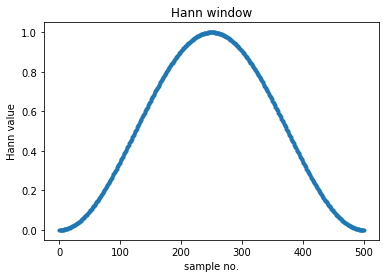

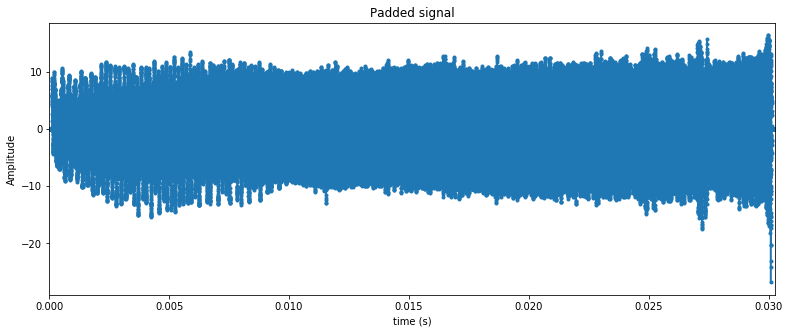

MemoryError: 

In [1579]:
t0=time.time()
hann_r = 250
hann_base = np.hanning(2*hann_r+1)

plt.plot(hann_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
plt.show()

z_padded_s = np.linspace (0, 0, samples+2*hann_r)
z_0=z_padded_s
z_padded_s[hann_r:-hann_r] = s
x_hann=np.linspace(0.0, t+(2*hann_r/s_rate), samples+2*hann_r)

plt.figure(figsize=(13,5))
plt.plot(x_hann,z_padded_s,".-")
plt.xlim((0,max(x_hann)))
plt.title('Padded signal')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

win = np.zeros((samples, samples+hann_r+hann_r))
for i in range(samples):
    win [i][i:i+hann_r+hann_r+1]=hann_base

plt.figure(figsize=(10,5))
plt.imshow(win)
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

(4000, 4500)


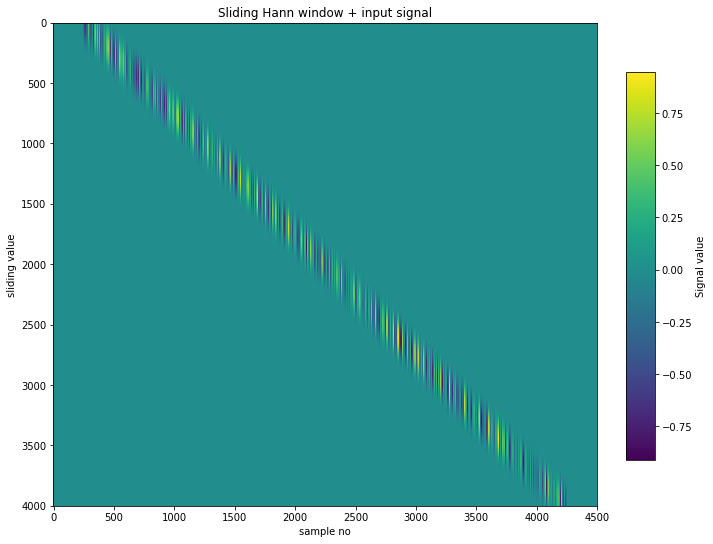

In [1503]:
print(win.shape)
z_win = np.zeros((samples, samples+hann_r*2))
for i in range(samples):
    z_win[i] = win[i] * z_padded_s

plt.figure(figsize=(10,10))
plt.imshow(z_win)
plt.title('Sliding Hann window + input signal')
plt.xlabel('sample no')
plt.ylabel('sliding value')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

In [1504]:

z_win_fft = np.zeros((samples, samples+hann_r*2))
for i in range(samples):
    z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i])) 
print(z_win_fft.shape)
t1=time.time()
hann_big=np.zeros(samples)
for i in range(2*hann_r):
    hann_big[int(samples/2-hann_r+i)] = hann_base[i]

f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,1000,window=hann_big, nperseg=samples, noverlap =samples-1)
t2=time.time()

print(t1-t0)
print(t2-t1)

(4000, 4500)
9.654993772506714
0.9878635406494141


In [1511]:
print(len(f_ax))
z_spy_stft_cutted = np.zeros((int(frangemax*t),samples))
for i in range(samples):
    for j in range(int(frangemax*t)):
        z_spy_stft_cutted [j][i] = np.abs(z_spy_stft [j][i])**2

z_win_fft_cutted = np.zeros((int(frangemax*max(x_hann)), samples))
for i in range(samples):
    for j in range(int(frangemax*max(x_hann))):
        z_win_fft_cutted [j][i] = z_win_fft [i][j]**2

2001


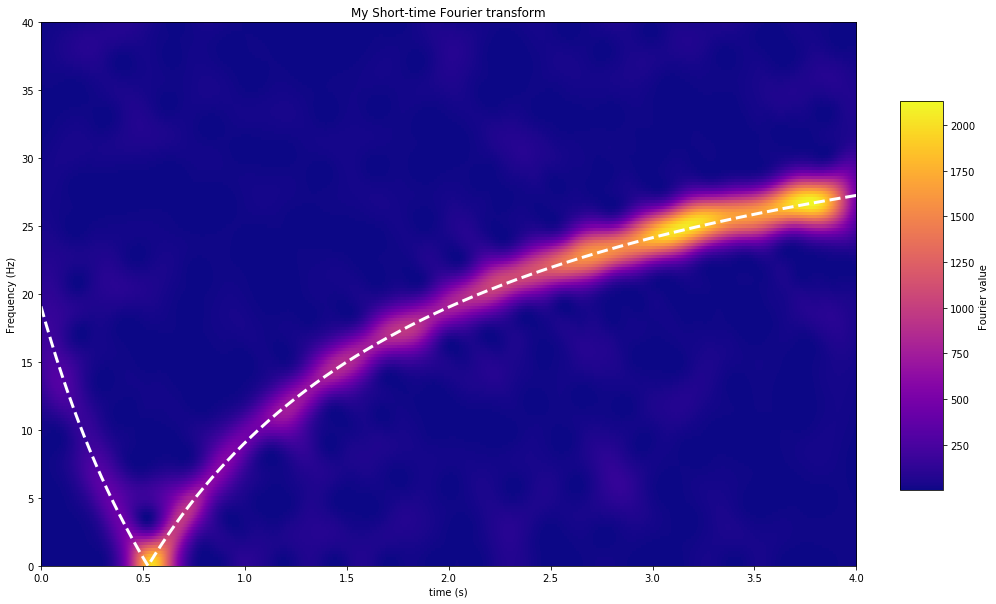

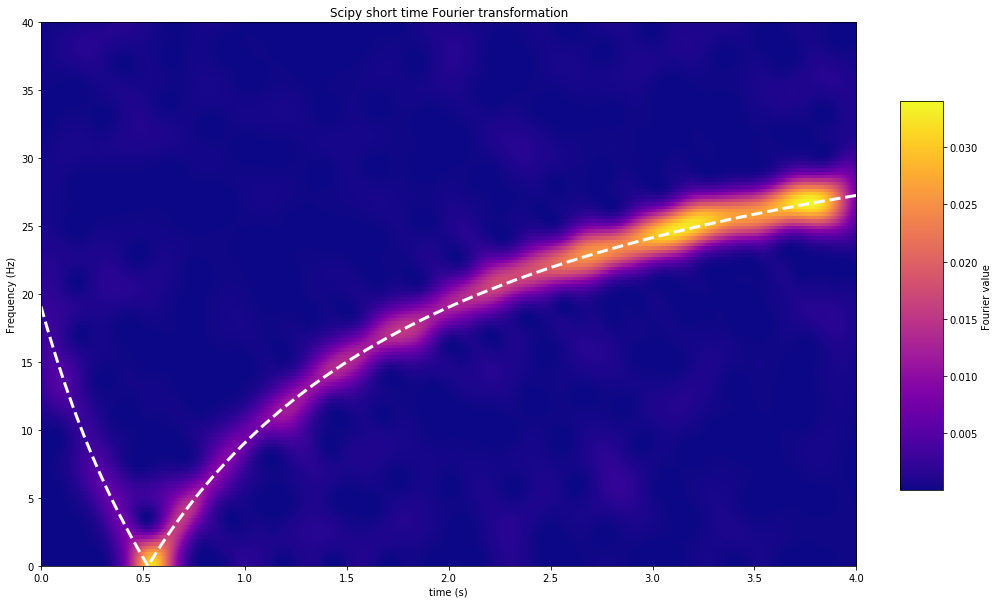

In [1512]:
fig, ax = plt.subplots(figsize=(15,10))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')
img = ax.imshow(z_win_fft_cutted,cmap='plasma', interpolation='none', aspect='auto',  extent=[0,t,frangemax,0])
plt.title('My Short-time Fourier transform')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time (s)')
plt.subplots_adjust(right=0.88)
plt.gca().invert_yaxis()
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(img,cax=cax).set_label('Fourier value')
plt.show()

fig, ax = plt.subplots(figsize=(15,10))
#plt.figure(figsize=(15,10))
#plt.pcolormesh(f_ax, t_ax, np.abs(z_spy_stft), vmin=0, vmax=amp)
ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')
plt.title('Scipy short time Fourier transformation')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time (s)')
plt.subplots_adjust(right=0.88)
img2 = ax.imshow(np.abs(z_spy_stft_cutted),cmap='plasma', interpolation='none', aspect='auto', extent=[0,t,frangemax,0])
plt.gca().invert_yaxis()
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(img2,cax=cax).set_label('Fourier value')
plt.show()

## Small observations
Now, we make histograms of the noise and the entire signal. The difference - if the input is a single frequency - only one point. In general: it is the signal. We will fit a half gaussian onto these, and see, how likely it is, that the difference (signal) is produced by the noise.

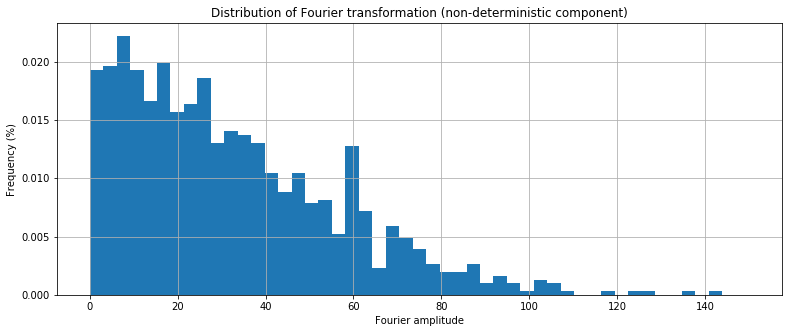

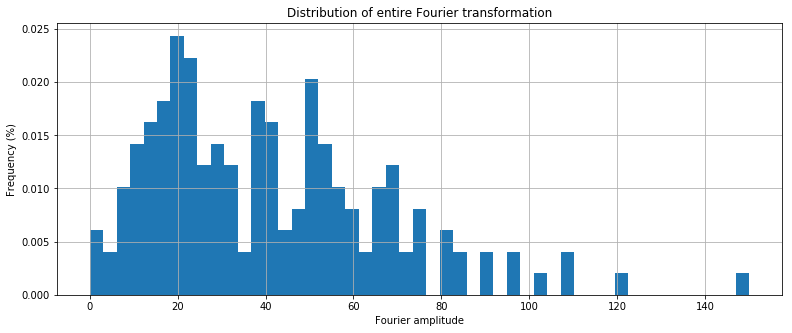

In [1507]:
hist_bins = np.linspace(0.0, 150, 50)

plt.figure(figsize=(13,5))
plt.hist(yf_noise,hist_bins, density=True)
plt.title('Distribution of Fourier transformation (non-deterministic component)')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.hist(yfabs, hist_bins, density=True)
plt.title('Distribution of entire Fourier transformation')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()

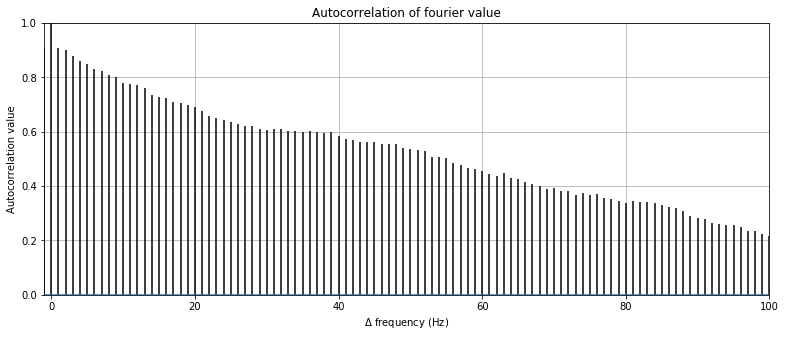

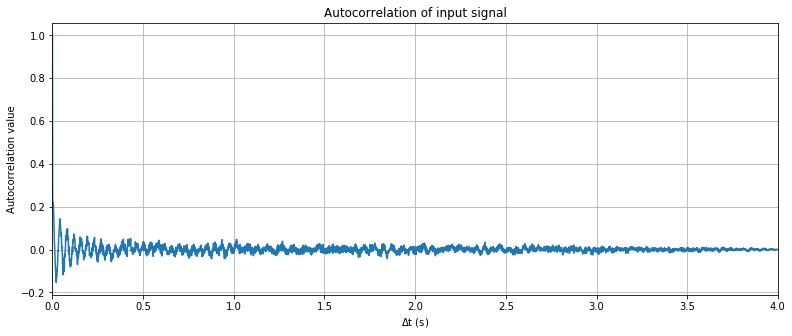

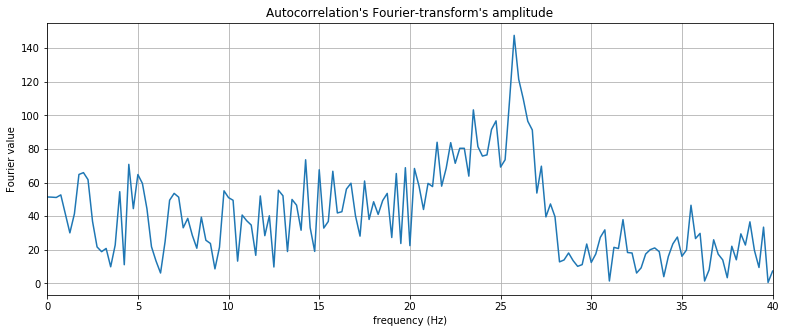

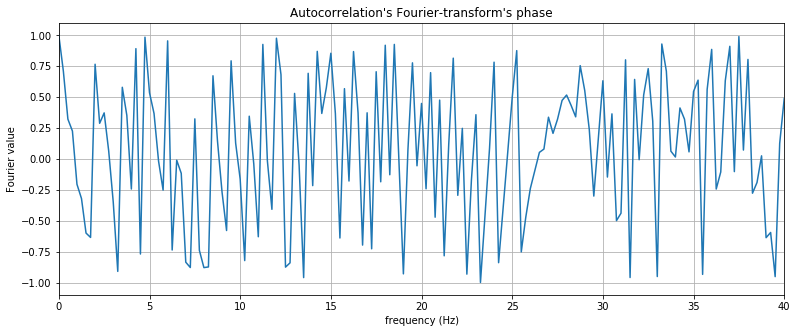

In [1508]:
plt.figure(figsize=(13,5))
plt.acorr(yfabs, maxlags=100)
plt.axis([-1,100,0,1])
#plt.xlim((0,frangemax))
plt.xlabel('$\Delta$ frequency (Hz)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of fourier value')
plt.grid(True)
plt.show()

def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

s_acf=acf(s)
s_acf=s_acf/np.max(s_acf)
s_acf_fft_abs=abs(scipy.fftpack.fft(s))
s_acf_fft_ang=np.angle(scipy.fftpack.fft(s))/np.pi

plt.figure(figsize=(13,5))
plt.plot(x,s_acf)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,t))
plt.xlabel('$\Delta$t (s)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of input signal')
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_abs[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's amplitude")
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_ang[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's phase")
plt.grid(True)
#plt.show()

We can see, that the ratio of the values of the Fourier transform of the deterministic and non-deterministic components of the input signal is practically a constant, and it is influenced by the relative amplitude of these components in the original signal. Is this a coincidence? [drawing](https://i.redd.it/nnlrafulz5701.jpg)

In [1509]:
det_noise_fft_ratios = yfabs/np.abs(yf_noise[:xf.size]+yf_det[:xf.size])
print("Ratio of the ffts of deterministic and non-deterministic components:",'\naverage:',np.average(det_noise_fft_ratios))
print('Standard deviation:',np.std(det_noise_fft_ratios))
if 0<np.std(det_noise_fft_ratios)<0.001 :
    print("The deviation is practically zero.")

Ratio of the ffts of deterministic and non-deterministic components: 
average: 0.4
Standard deviation: 2.79616842059714e-16
The deviation is practically zero.


## Tasks
<br> Fix zooming
<br> Lower the redundancy (memory error)
<br> 
<br> debug
<br> Nyquist freq as frangemax - implemented
<br> Lookup pandas
<br> Load in datas
<br> Import and evaluate chirps
<br> Reconstruct wave frequencies and amplitudes
<br> Get the radial ?function of several wave types